In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

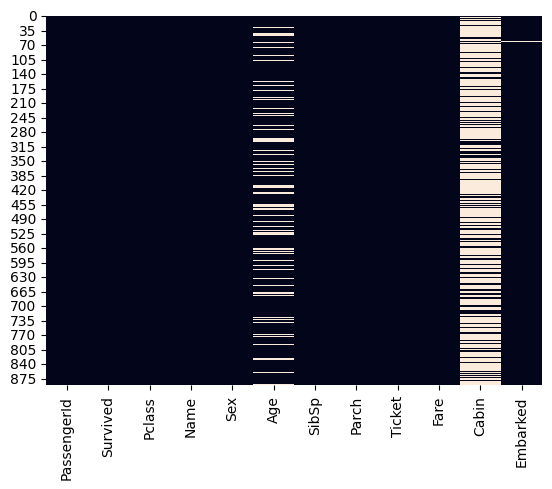

In [4]:
titanic_data = pd.read_csv("datasets/titanic.csv")
sns.heatmap(titanic_data.isnull(),cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

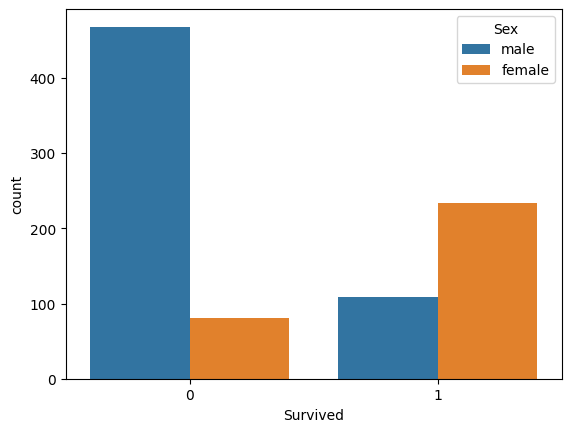

In [5]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

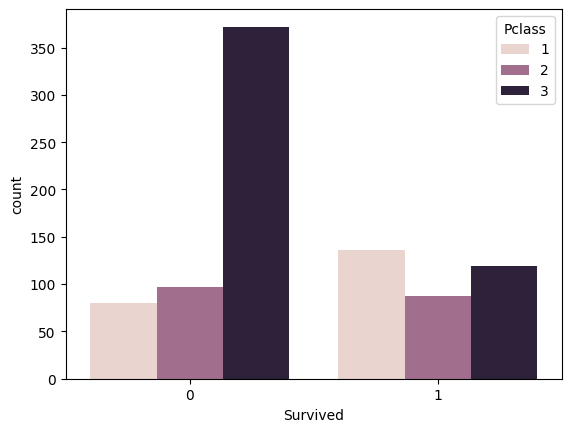

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
